There are 4 principal assumptions which justify the use of linear regression models for purposes of inference or prediction:

** (i) linearity and additivity ** of the relationship between dependent and independent variables:

    (a) The expected value of dependent variable is a straight-line function of each independent variable, holding the others fixed.

    (b)  The effects of different independent variables on the expected value of the dependent variable are additive.
    
** (ii) normality of the error distribution. **

** (iii) statistical independence of the errors ** (in particular, no correlation between consecutive errors in the case of __time series__ data)

** (iv) homoscedasticity (constant variance) of the errors **

    (a) versus time (in the case of time series data)

    (b) versus the predictions

    (c) versus any independent variable


If any of these assumptions is violated (i.e., if there are nonlinear relationships between dependent and independent variables or the errors exhibit correlation, heteroscedasticity, or non-normality), then the forecasts, confidence intervals, and scientific insights yielded by a regression model may be (at best) inefficient or (at worst) seriously biased or misleading.  

In [1]:
import pandas as pd
import numpy  as np

# import plotting libraries
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline 

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

# These are for running the model and conducting model diagnostics
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from scipy import stats
from statsmodels.compat import lzip
#from pandas.core import datetools

from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import anderson

# import the ML algorithm
from sklearn.linear_model import LinearRegression


from sklearn.model_selection import train_test_split


In [2]:
# dataset 1
location = r"E:\MYLEARN\2-ANALYTICS-DataScience\datasets\Advertising.csv"

In [3]:
# load the adv data
df_adv = pd.read_csv(location)
df_adv.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
# dataset 2
df_ins = pd.read_csv("https://raw.githubusercontent.com/researchpy/Data-sets/master/insurance.csv")
    
df_ins.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df_adv.shape, df_ins.shape

((200, 5), (1338, 7))

# Categorical to numeric conversion

In [6]:
df_ins['sex'].replace({'female' : 1, 'male' : 0}, inplace= True)
df_ins['smoker'].replace({'no': 0, 'yes': 1}, inplace= True)

In [7]:
df_ins = pd.get_dummies(df_ins)
df_ins.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,0,0,0,1
1,18,0,33.770,1,0,1725.55230,0,0,1,0
2,28,0,33.000,3,0,4449.46200,0,0,1,0
3,33,0,22.705,0,0,21984.47061,0,1,0,0
4,32,0,28.880,0,0,3866.85520,0,1,0,0


When using dummy variables, it is important to not include 1 of the dummy variables per original categorical variable. 

For example, since region had 4 possible categories, we will include 3 of those 4 in the model and the 4th category will still be captured in the model’s intercept.

In [8]:
# For insurance dataset
# Statsmodel (linear regression)
model_ins = smf.ols("charges ~ age + bmi + sex + smoker + children + region_northwest + region_southeast + region_southwest", 
                data= df_ins).fit()
    
model_ins.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Fri, 06 Sep 2019   Prob (F-statistic):               0.00
Time:                        08:10:28   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -1.207e+04    999.649    -12.074      0.000    -1.4e+04   -1.01e+04
age                256.8564     11.899     21.587      0.000     233.514     280.199
bmi                339.1935     28.599     11.860      0.000     283.088     395.298
sex                131.3144    332.945      0.394      0.693    -521.842     784.470
smoker            2.385e+04    413.153     57.723      0.000     2.3e+04    2.47e+04
children           475.5005    137.804      3.451      0.001     205.163     745.838
region_northwest  -352.9639    476.276     -0.741      0.459   -1287.298     581.370
region_southeast -1035.0220    478.692     -2.162      0.031   -1974.097     -95.947
region_southwest  -960.0510    477.933     -2.009      0.045   -1897.636     -22.466
==============================================================================
Omnibus:                      300.366   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              718.887
Skew:                           1.211   Prob(JB):                    7.86e-157
Kurtosis:                       5.651   Cond. No.                         315.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
# For adv dataset
# Statsmodel (linear regression)
model_adv = smf.ols("sales ~ TV + radio + newspaper", 
                data= df_adv).fit()
    
model_adv.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 06 Sep 2019   Prob (F-statistic):           1.58e-96
Time:                        08:10:29   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 1. linearity

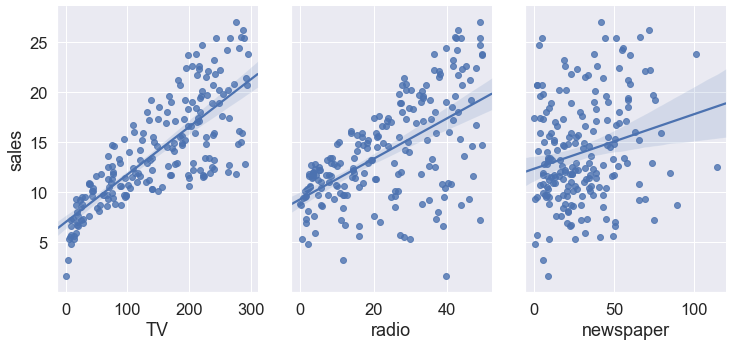

In [10]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(df_adv, 
             x_vars=['TV','radio','newspaper'], 
             y_vars='sales', 
             height=5, 
             aspect=0.7, 
             kind='reg');

In [12]:
df_ins.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges',
       'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest'],
      dtype='object')

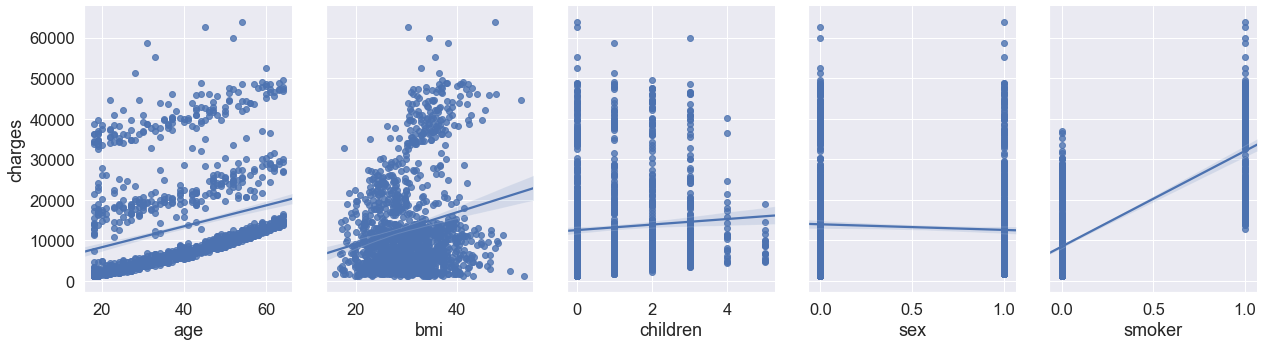

In [13]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(df_ins, 
             x_vars=['age','bmi','children', 'sex', 'smoker'], 
             y_vars='charges', 
             height=5, 
             aspect=0.7, 
             kind='reg');

# 2. normality of the error distribution.

If there is structure in the residuals, it suggests that simple linear regression is not appropriate:

Example ...

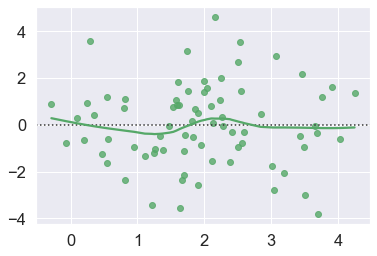

In [14]:
# Make an example dataset with y ~ x
rs = np.random.RandomState(7)
x  = rs.normal(2, 1, 75)
y  = 2 + 1.5 * x + rs.normal(0, 2, 75)

# Plot the residuals after fitting a linear model
sns.residplot(x, y, lowess=True, color="g")

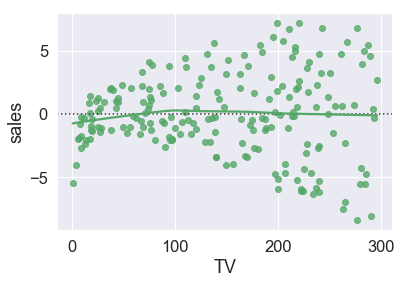

In [12]:
# Plot the residuals after fitting a linear model
sns.residplot(data=df_adv, x='TV', y='sales', lowess=True, color="g")

Text(0, 0.5, 'Predicted y')

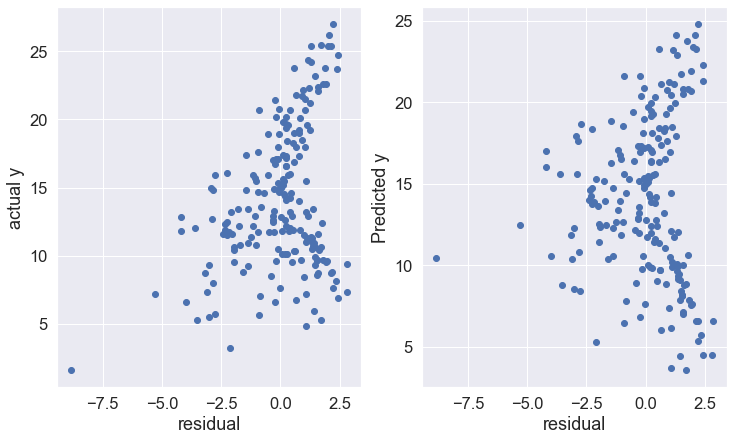

In [12]:
# create a Python list of feature names
feature_cols = ['TV', 'radio', 'newspaper']

# use the list to select a subset of the original DataFrame
X = df_adv[feature_cols]

# select a Series from the DataFrame
y = df_adv['sales']

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X, y)

# make predictions on the testing set
y_pred = linreg.predict(X)

residuals = y - y_pred

df_residuals = pd.DataFrame(residuals)

# plot residuals
# df_residuals.plot()
plt.figure(figsize=(12, 7))
plt.subplot(121)
plt.scatter(residuals, y);
plt.xlabel('residual')
plt.ylabel('actual y')

plt.subplot(122)
plt.scatter(residuals, y_pred);
plt.xlabel('residual')
plt.ylabel('Predicted y')

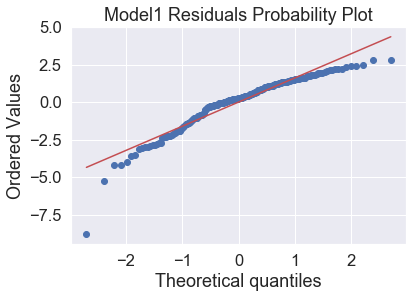

In [13]:
stats.probplot(residuals, plot= plt)
plt.title("Model1 Residuals Probability Plot");

the residuals which will be represented as dots (in blue) should fall on the red line. This plot indicates that the model’s residuals are __not normally distributed.__

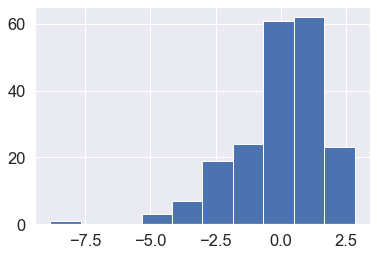

In [14]:
# histogram plot
plt.hist(residuals);

In [15]:
# normality test
stat, p = shapiro(residuals)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.918, p=0.000
Sample does not look Gaussian (reject H0)


In [16]:
# normality test
stat, p = normaltest(residuals)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=60.414, p=0.000
Sample does not look Gaussian (reject H0)


In [79]:
# Kolmogorov-Smirnov test (for normality)
stats.kstest(residuals, 'norm')

KstestResult(statistic=0.16255639830449164, pvalue=4.375373370635316e-05)

The test is significant which indicates that the model’s residuals are not normally distributed. REJECT the null hypothesis (that the residuals are normally distributed)

###  Home Work, repeat the above for df_ins

There are no strong correlations between the IVs meaning there is no need to worry about multicollinearity.

# 3. Diagnosing Homoscedasticity

- Brown-Forsythe test, 
- Levene’s test, 
- Bruesch-Pagan test, or 
- Cook-Weisberg test

$H_0$ = Homoscedasticity is present, variance is same

$H_A$ = heteroscedasticity is present

> The test for homoscedasticity of variance needs to be conducted for each level of the categorical variables.

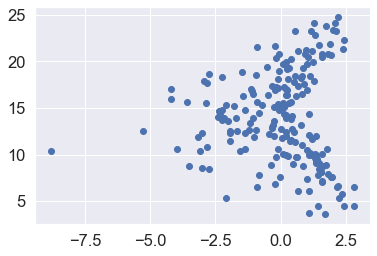

In [17]:
plt.scatter(residuals, y_pred);

In [135]:
df_adv.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [134]:
model_adv.model.exog

array([[  1. , 230.1,  37.8,  69.2],
       [  1. ,  44.5,  39.3,  45.1],
       [  1. ,  17.2,  45.9,  69.3],
       [  1. , 151.5,  41.3,  58.5],
       [  1. , 180.8,  10.8,  58.4],
       [  1. ,   8.7,  48.9,  75. ],
       [  1. ,  57.5,  32.8,  23.5],
       [  1. , 120.2,  19.6,  11.6],
       [  1. ,   8.6,   2.1,   1. ],
       [  1. , 199.8,   2.6,  21.2],
       [  1. ,  66.1,   5.8,  24.2],
       [  1. , 214.7,  24. ,   4. ],
       [  1. ,  23.8,  35.1,  65.9],
       [  1. ,  97.5,   7.6,   7.2],
       [  1. , 204.1,  32.9,  46. ],
       [  1. , 195.4,  47.7,  52.9],
       [  1. ,  67.8,  36.6, 114. ],
       [  1. , 281.4,  39.6,  55.8],
       [  1. ,  69.2,  20.5,  18.3],
       [  1. , 147.3,  23.9,  19.1],
       [  1. , 218.4,  27.7,  53.4],
       [  1. , 237.4,   5.1,  23.5],
       [  1. ,  13.2,  15.9,  49.6],
       [  1. , 228.3,  16.9,  26.2],
       [  1. ,  62.3,  12.6,  18.3],
       [  1. , 262.9,   3.5,  19.5],
       [  1. , 142.9,  29.3,  12.6],
 

In [37]:
name = ['Lagrange multiplier statistic', 
        'p-value', 
        'f-value', 
        'f p-value']

test = sms.het_breuschpagan(residuals, model_adv.model.exog)


In [38]:
test

(5.1328723532857, 0.16232215845411768, 1.7209042102916243, 0.163999089056063)

In [133]:
lzip(name, test)

[('Lagrange multiplier statistic', 5.1328723532857),
 ('p-value', 0.16232215845411768),
 ('f-value', 1.7209042102916243),
 ('f p-value', 0.163999089056063)]

Tests are significant meaning the data violates the assumption of homoscedasticity, i.e. heteroscedasticity is present in the data

In [ ]:
# check for adv data for homoschedascity /????????/

In [ ]:
########## STOP ################

In [19]:
# for categorical variables

sex_variance_results = stats.levene(df['charges'][df['sex'] == 0], 
                                    df['charges'][df['sex'] == 1], center= 'median')

smoker_variance_results = stats.levene(df['charges'][df['smoker'] == 0],
                                       df['charges'][df['smoker'] == 1], center= 'median')

region_variance_results = stats.levene(df['charges'][df['region_northeast'] == 1],
                                       df['charges'][df['region_northwest'] == 1],
                                       df['charges'][df['region_southeast'] == 1],
                                       df['charges'][df['region_southwest'] == 1], center= 'median')

print(f"Sex Variance: {sex_variance_results}", "\n",
      f"Smoker Variance: {smoker_variance_results}", "\n",
      f"Region Variance: {region_variance_results}", "\n")

Sex Variance: LeveneResult(statistic=9.90925122305512, pvalue=0.0016808765833903443) 
 Smoker Variance: LeveneResult(statistic=332.6135162726081, pvalue=1.5593284881803726e-66) 
 Region Variance: LeveneResult(statistic=5.559966758410606, pvalue=0.0008610590250786703) 



# 4. Diagnosing Multicollinearity

In [80]:
df_adv.corr()

,Unnamed: 0,TV,radio,newspaper,sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
radio,-0.110680,0.054809,1.000000,0.354104,0.576223
newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
sales,-0.051616,0.782224,0.576223,0.228299,1.000000
